<a href="https://colab.research.google.com/github/jj11031/Machine-Learning-Projects/blob/main/House_Price_Prediction_Regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Precise Prediction for dataset from California: A Continuous regression type predictive modelling ML project.**


Importing dependencies - libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Median house price will be our target variable. Let's do some exploratory data analysis to understand the dataset/variables/features.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Dropping NA values. Though there are many methods of [imputations](https://scikit-learn.org/stable/modules/impute.html) to deal with missing values, since the numbers of NA values are less, we would just keep it simple and remove the NA valued rows.

In [51]:
data.dropna(inplace=True)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [53]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis = 1)
y = data["median_house_value"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [55]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

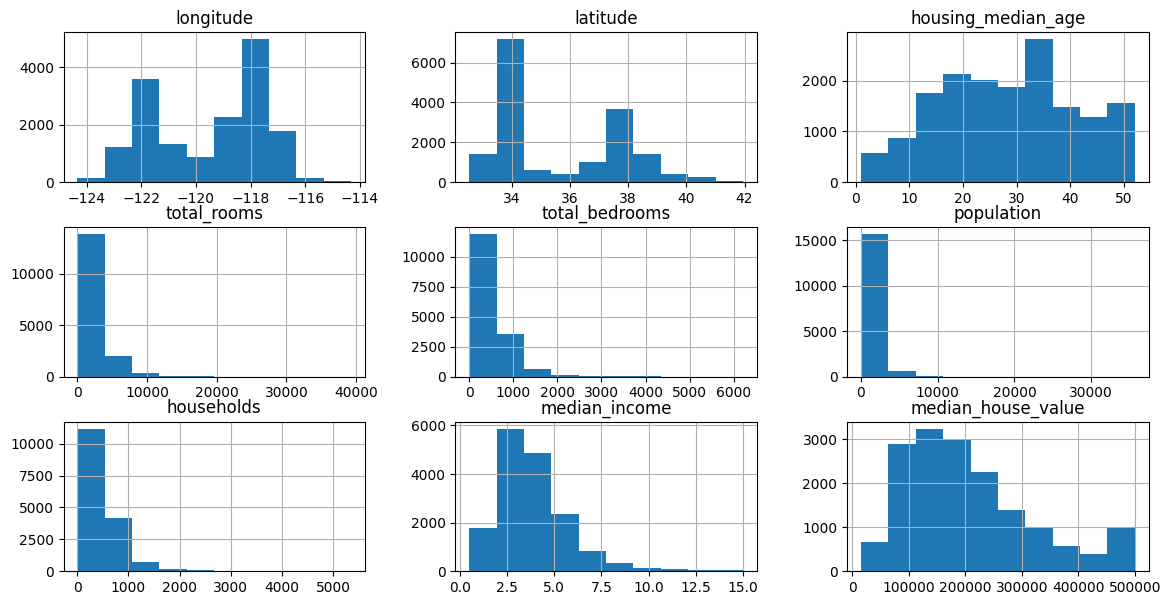

In [56]:
train_data.hist(figsize = (14,7))

<ipython-input-57-d7758f52e809>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot = True)


<Axes: >

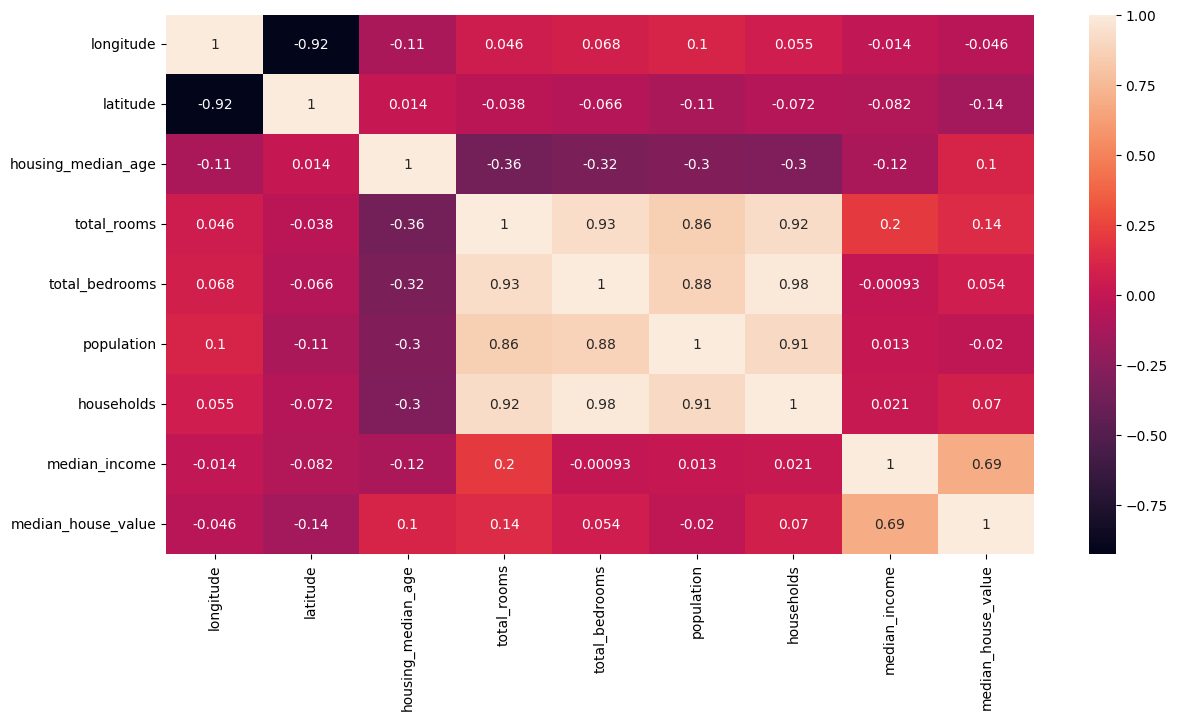

In [57]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot = True)

Scaling certaining featuring by log transformming them to improve their distribution for fitting the model.

In [58]:
train_data["total_rooms"]=np.log(train_data["total_rooms"]+1)
train_data["total_bedrooms"]=np.log(train_data["total_bedrooms"]+1)
train_data["population"]=np.log(train_data["population"]+1)
train_data["households"]=np.log(train_data["households"]+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

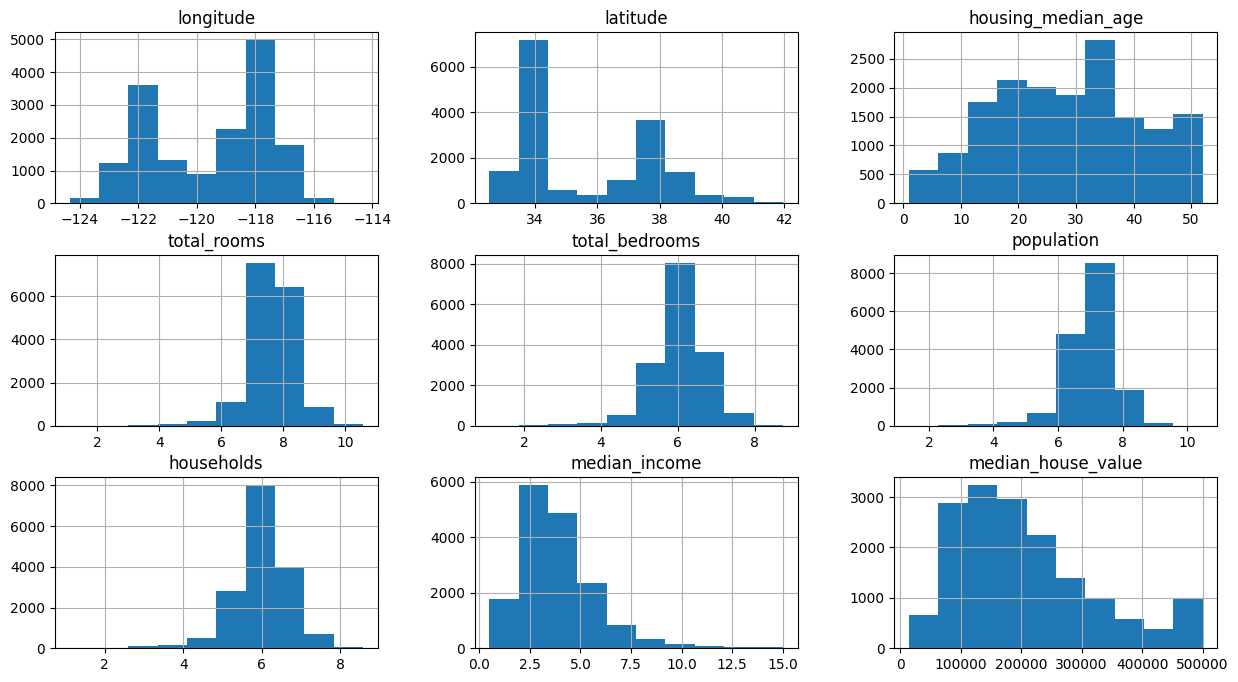

In [59]:
train_data.hist(figsize=(15,8))

In [60]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7259
INLAND        5200
NEAR OCEAN    2098
NEAR BAY      1785
ISLAND           4
Name: ocean_proximity, dtype: int64

In [61]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6774,1,0,0,0,0
1574,0,0,0,1,0
17612,1,0,0,0,0
2872,0,1,0,0,0
16991,0,0,0,1,0
...,...,...,...,...,...
9067,0,1,0,0,0
4088,1,0,0,0,0
8633,1,0,0,0,0
19221,1,0,0,0,0


Transform categorical features via one-hot-encoding into dummy variables for fitting the model

In [62]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
6774,-118.15,34.12,43.0,7.501634,6.059123,6.610696,6.063785,3.8529,<1H OCEAN,350000.0,1,0,0,0,0
1574,-122.03,37.83,24.0,8.690978,6.605298,7.599902,6.566672,9.8708,NEAR BAY,500001.0,0,0,0,1,0
17612,-121.91,37.29,18.0,8.188133,6.499787,7.186901,6.386879,5.3077,<1H OCEAN,351400.0,1,0,0,0,0
2872,-118.95,35.37,37.0,7.297091,5.793014,6.853299,5.690359,1.6728,INLAND,55400.0,0,1,0,0,0
16991,-122.28,37.55,17.0,8.342840,6.445720,7.611348,6.447306,6.1228,NEAR BAY,375700.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9067,-118.16,34.71,27.0,8.700847,6.906755,7.893945,6.783325,4.1719,INLAND,117200.0,0,1,0,0,0
4088,-118.41,34.15,33.0,8.302266,6.767343,7.436028,6.768493,4.3468,<1H OCEAN,425900.0,1,0,0,0,0
8633,-118.40,33.88,35.0,7.469654,5.693732,6.423247,5.620401,7.5000,<1H OCEAN,500001.0,1,0,0,0,0
19221,-122.71,38.46,23.0,8.077447,6.403574,7.170120,6.383507,3.9261,<1H OCEAN,213300.0,1,0,0,0,0


In [63]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

<Axes: >

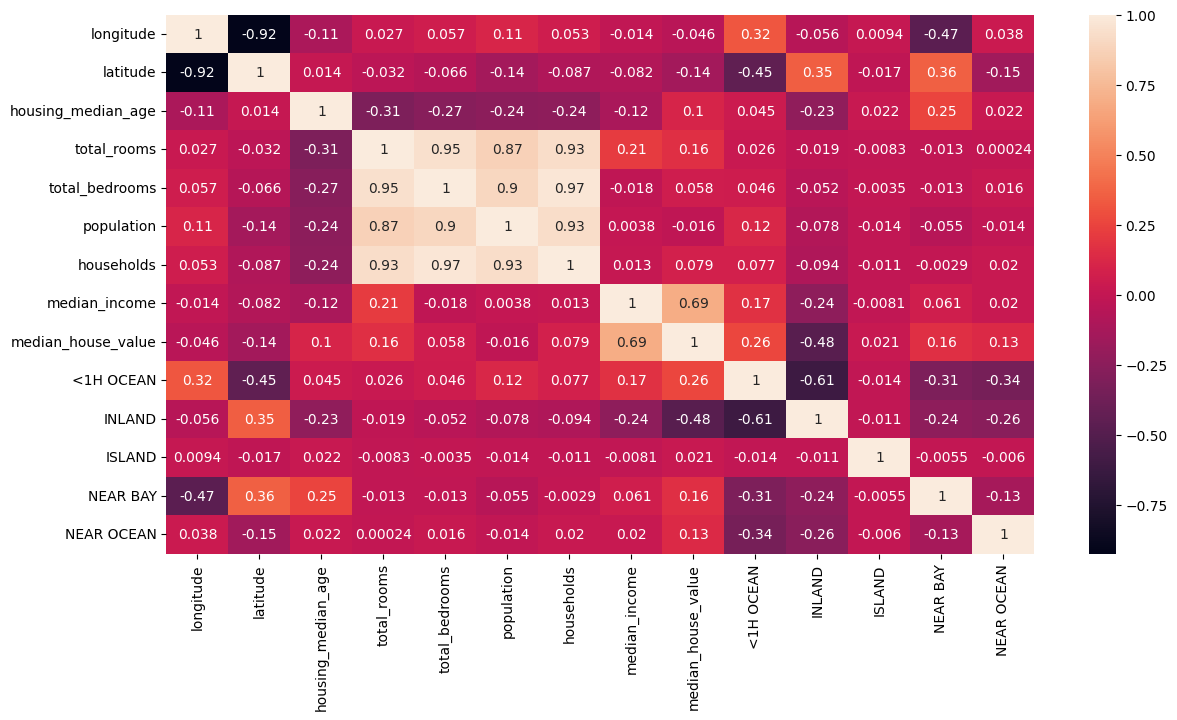

In [64]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot = True)

<Axes: xlabel='latitude', ylabel='longitude'>

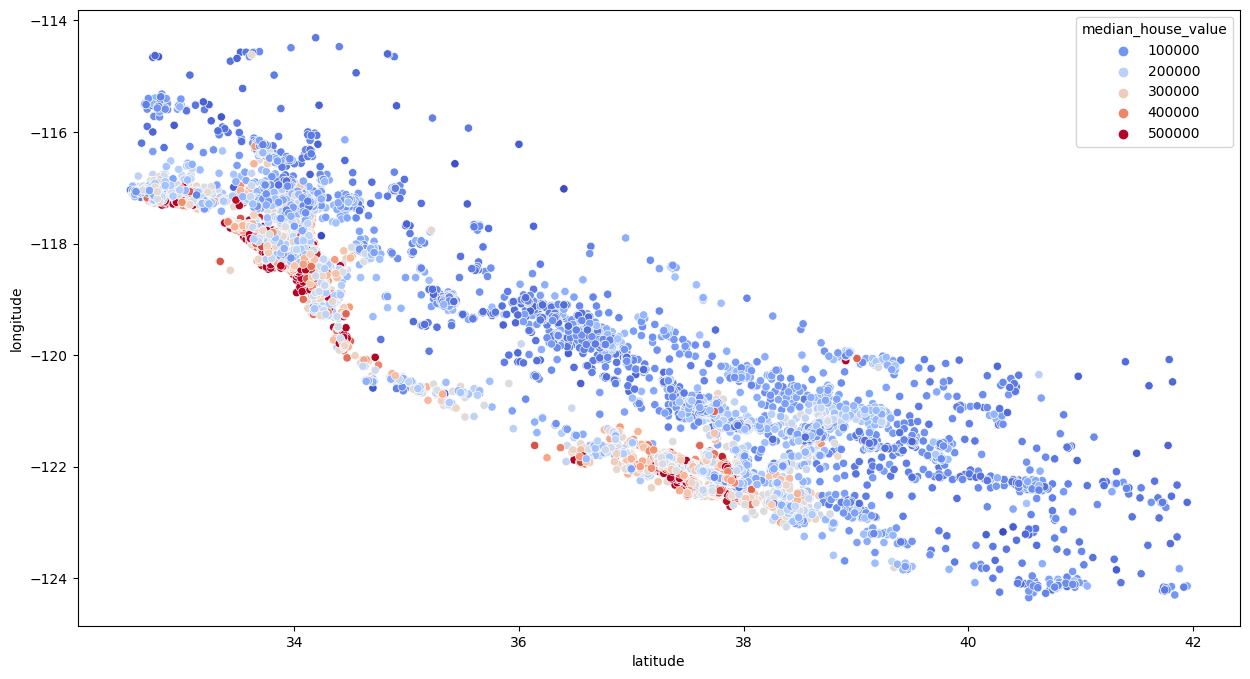

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value",palette="coolwarm")

The above plot helps us visualize the trend of median house price and why those close to the coast are more expensive.

Let's do some feature engineering.

In [66]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

<Axes: >

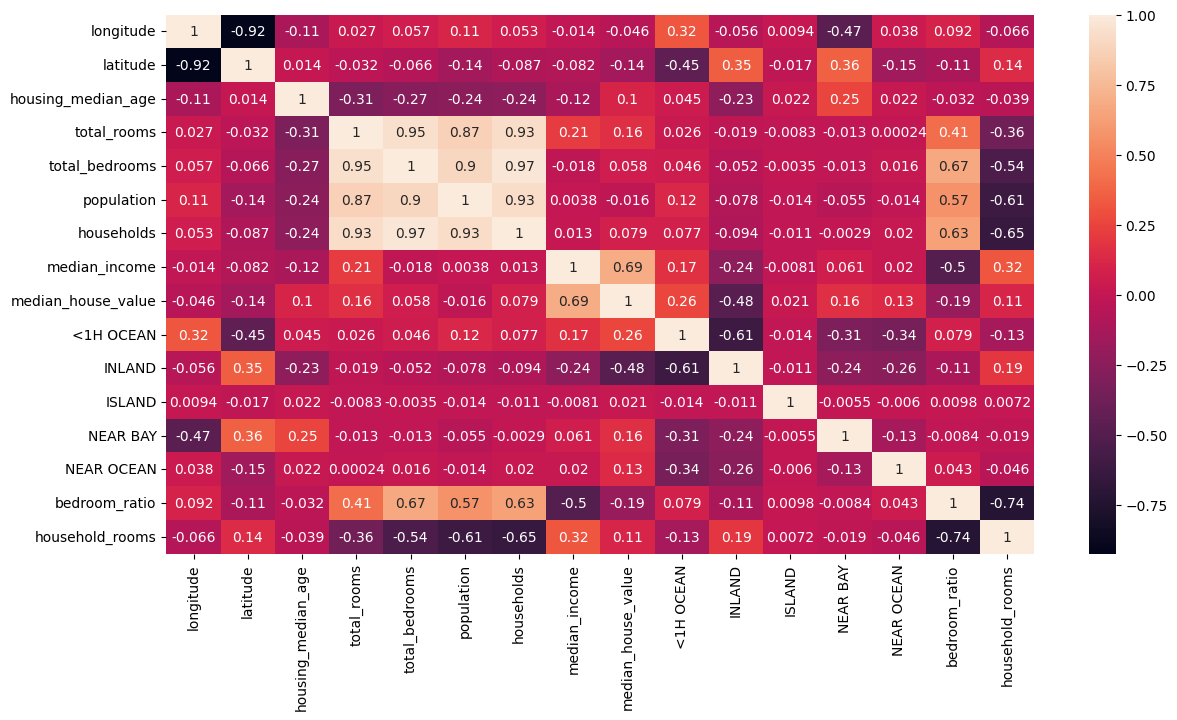

In [67]:
plt.figure(figsize=(14,7))
sns.heatmap(train_data.corr(), annot = True)

Let's train some models.

In [76]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [77]:
test_data = X_test.join(y_test)
test_data["total_rooms"]=np.log(test_data["total_rooms"]+1)
test_data["total_bedrooms"]=np.log(test_data["total_bedrooms"]+1)
test_data["population"]=np.log(test_data["population"]+1)
test_data["households"]=np.log(test_data["households"]+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]



In [78]:
X_test, y_test = test_data.drop(["median_house_value"], axis = 1), test_data["median_house_value"]

In [79]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
5950,-117.87,34.14,30.0,7.822445,6.375025,7.038784,6.327937,2.9375,209200.0,0,1,0,0,0,0.814966,1.236176
4291,-118.30,34.10,36.0,7.734121,6.802395,7.583248,6.733402,1.9297,203300.0,1,0,0,0,0,0.879530,1.148620
12764,-121.40,38.61,33.0,8.164226,6.716595,7.323831,6.663133,1.9908,118800.0,0,1,0,0,0,0.822686,1.225283
13100,-121.39,38.43,3.0,7.899895,5.953243,6.898715,5.758902,5.4445,237600.0,0,1,0,0,0,0.753585,1.371771
6158,-117.96,34.08,33.0,8.331345,6.746412,8.178639,6.744059,3.1912,159900.0,1,0,0,0,0,0.809763,1.235361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,-119.48,37.00,16.0,7.974189,6.313548,7.291656,6.234411,3.1736,111800.0,0,1,0,0,0,0.791748,1.279061
20138,-119.05,34.40,50.0,7.120444,5.645447,6.984716,5.552960,2.6991,181300.0,1,0,0,0,0,0.792850,1.282279
5483,-118.46,33.99,37.0,7.511525,6.133398,6.981006,6.118097,4.3370,360600.0,1,0,0,0,0,0.816532,1.227755
15084,-116.96,32.80,25.0,8.137980,6.689599,7.427739,6.610696,3.3690,134400.0,1,0,0,0,0,0.822022,1.231032


In [80]:
reg.score(X_test, y_test)

0.6864422265804488

Above we just performed a linear regression to train a model and then run it with test data. We did not do scaling or further feature engineering but kept it simple.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(["median_house_value"], axis = 1), train_data["median_house_value"]

X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [85]:
X_test_s = scaler.transform(X_test)

In [125]:
LiRScore = reg.score(X_test_s, y_test)

Let's use another model - Random forest (an advanced one). One may refer to [these videos](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ) to learn more about various machine learning models.

In [120]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [121]:
RFScore1 = forest.score(X_test, y_test)

We can immediately see a rise in the score from 0.686 using linear regression to 0.825 using Random Forest!

In [122]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [132]:
best_forest = grid_search.best_estimator_

In [133]:
best_forest.score(X_test_s,y_test)

0.8197648325627609

In [134]:
RFScore2 = best_forest.score(X_test_s,y_test)

Well, the score is not increasing but decreasing. Let's try changing the grid search parameters for hyperparameter tuning.

In [101]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid2 = {
    "n_estimators": [100, 200, 300],
    "max_features": [2, 4],
    "max_depth": [None, 4, 8]
}

grid_search2 = GridSearchCV(forest, param_grid2, cv = 5, scoring = "neg_mean_squared_error", return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'max_features': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [102]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=300)

In [103]:
best_forest = grid_search.best_estimator_

In [128]:
RFScore3 = best_forest.score(X_test_s, y_test)

The score is not yet better than the model with no hyperparameter tuning.

Let's add another model - XGBoost. One can learn more about XGBoost [here](https://www.youtube.com/watch?v=OtD8wVaFm6E).

In [108]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state = 111) # Adding random state for reproducible results


Making a dictionary of hyperparameter values to search

In [109]:
search_space = {"n_estimators": [100, 200, 500],
                "max_depth": [3, 6, 9],
                "gamma" : [0.01, 0.1],
                "learning_rate": [0.001, 0.1, 0.1, 1]}

In [110]:
from sklearn.model_selection import GridSearchCV

#Making grid search object

GS = GridSearchCV(estimator = xgb_model, param_grid= search_space, scoring = ["r2","neg_root_mean_squared_error"],
                  refit = "r2", cv = 5, verbose = 4)

In [111]:
GS.fit(X_train_s, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-109757.429) r2: (test=0.103) total time=   0.9s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-110123.493) r2: (test=0.100) total time=   0.8s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-108721.782) r2: (test=0.099) total time=   0.4s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-110883.044) r2: (test=0.101) total time=   0.4s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=100; neg_root_mean_squared_error: (test=-106102.046) r2: (test=0.108) total time=   0.2s
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=200; neg_root_mean_squared_error: (test=-104438.725) r2: (tes

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=111, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.1, 0.1, 1],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 500]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'],
             verbose=4)

In [112]:
print(GS.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=111, ...)


In [113]:
print(GS.best_params_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}


In [124]:
XGBGScore = GS.best_score_

In [116]:
df = pd.DataFrame(GS.cv_results_)
df = df.sort_values("rank_test_r2")
df.to_csv("cv_results.csv")

In [126]:
print(LiRScore)

0.6864422265804488


In [135]:
print(RFScore1, RFScore2, RFScore3, XGBGScore)

0.8245476228385511 0.8197648325627609 0.8222674141822952 0.8349663897174201


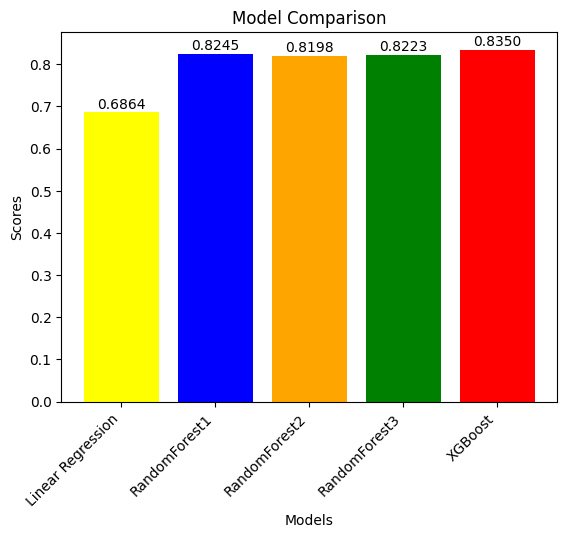

In [138]:
# Your scores
scores = [0.6864422265804488, 0.8245476228385511, 0.8197648325627609, 0.8222674141822952, 0.8349663897174201]
model_names = ["Linear Regression", 'RandomForest1', 'RandomForest2', 'RandomForest3', 'XGBoost']

# Bar plot with annotations
plt.bar(model_names, scores, color=["yellow", 'blue', 'orange', 'green', 'red'])
[plt.text(i, score + 0.002, f'{score:.4f}', ha='center', va='bottom') for i, score in enumerate(scores)]

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

 XGBoost model has best R squred score among those that were tested. Further readings on model metrics can be found [here](https://scikit-learn.org/stable/modules/model_evaluation.html#model-evaluation).